<a href="https://colab.research.google.com/github/17004963/SP1-LABS/blob/master/lesson3_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [3]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7012 sha256=f97eed7b7cc6638be2b080d4fda0cbcb8d7fd98834cc797ff736fe48a72efb45
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


# Testing an existing classifier

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

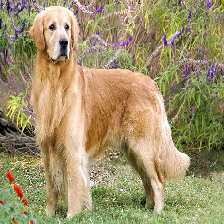

In [10]:
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [14]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [15]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [16]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

In [17]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


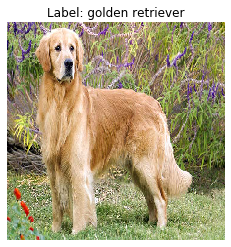

In [18]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

# Transfer Learning

## Build the dataset

In [0]:
class_names = ['Cristiano_Ronaldo','Lionel_messi']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'Lionel_messi')  
train_im_dir = os.path.join(train_dir, 'Cristiano_Ronaldo')  
validation_ca_dir = os.path.join(validation_dir, 'Lionel_messi') 
validation_im_dir = os.path.join(validation_dir, 'Cristiano_Ronaldo')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [22]:
queries = ['pulga','barcelona','argentina','soccer','football']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='lionel messi'+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=lionel messipulga&source=lnms&tbm=isch
Total Time : 0:00:05.413773
Invalid image:  45.jpg cannot identify image file '/content/Images/45.jpg'
Invalid image:  75.jpg cannot identify image file '/content/Images/75.jpg'
Invalid image:  14.jpg cannot identify image file '/content/Images/14.jpg'
Invalid image:  33.jpg cannot identify image file '/content/Images/33.jpg'
Invalid image:  57.jpg cannot identify image file '/content/Images/57.jpg'
Invalid image:  41.jpg cannot identify image file '/content/Images/41.jpg'
Invalid image:  95.jpg cannot identify image file '/content/Images/95.jpg'
Invalid image:  29.jpg cannot write mode RGBA as JPEG
Invalid image:  48.jpg cannot identify image file '/content/Images/48.jpg'
Invalid image:  38.jpg cannot identify image file '/content/Images/38.jpg'
Invalid image:  93.jpg cannot identify image file '/content/Images/93.jpg'
Invalid image:  59.jpg cannot identify image file '/content/Images/59.jpg'
Invalid image:  73.j

In [23]:
queries = ['cr7','Juventus','portugal','soccer','football']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='cristiano ronaldo'+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=cristiano ronaldocr7&source=lnms&tbm=isch
Total Time : 0:00:13.239796
Invalid image:  96.jpg cannot identify image file '/content/Images/96.jpg'
Invalid image:  75.jpg cannot write mode RGBA as JPEG
Invalid image:  80.jpg cannot write mode RGBA as JPEG
Invalid image:  23.jpg cannot identify image file '/content/Images/23.jpg'
Invalid image:  52.jpg cannot write mode P as JPEG
Invalid image:  64.jpg cannot write mode P as JPEG
Invalid image:  51.jpg cannot identify image file '/content/Images/51.jpg'
Invalid image:  6.jpg cannot identify image file '/content/Images/6.jpg'
Invalid image:  16.jpg cannot write mode RGBA as JPEG
Invalid image:  85.jpg cannot write mode RGBA as JPEG
Invalid image:  10.jpg cannot write mode RGBA as JPEG
Invalid image:  76.jpg cannot identify image file '/content/Images/76.jpg'
Invalid image:  66.jpg cannot write mode RGBA as JPEG
Invalid image:  59.jpg cannot identify image file '/content/Images/59.jpg'
Invalid image:  5.jpg 

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


https://www.google.co.in/search?q=cristiano ronaldofootball&source=lnms&tbm=isch
Total Time : 0:00:04.186638
Invalid image:  96.jpg cannot identify image file '/content/Images/96.jpg'


In [24]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Lionel Messi images:', len(os.listdir(train_ca_dir)))
print('total training Cristiano Ronaldo images:', len(os.listdir(train_im_dir)))

print('total validation Lionel Messi images:', len(os.listdir(validation_ca_dir)))
print('total validation Cristiano Ronaldo images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Lionel Messi images: 406
total training Cristiano Ronaldo images: 416
total validation Lionel Messi images: 49
total validation Cristiano Ronaldo images: 50
--
Total training images: 822
Total validation images: 99


## Using the dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [26]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 822 images belonging to 2 classes.


In [27]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 99 images belonging to 2 classes.


## Testing the classifier

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [29]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [30]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['rugby ball', 'military uniform', 'ping-pong ball',
       'horizontal bar', 'basketball', 'soccer ball', 'soccer ball',
       'soccer ball', 'ballplayer', 'horizontal bar', 'crutch',
       'rugby ball', 'sarong', 'football helmet', 'ballplayer',
       'ballplayer', 'Border collie', 'torch', 'revolver',
       'horizontal bar', 'balance beam', 'pajama', 'soccer ball',
       'football helmet', 'jersey', 'jersey', 'torch', 'mountain bike',
       'soccer ball', 'jersey', 'balance beam', 'torch'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

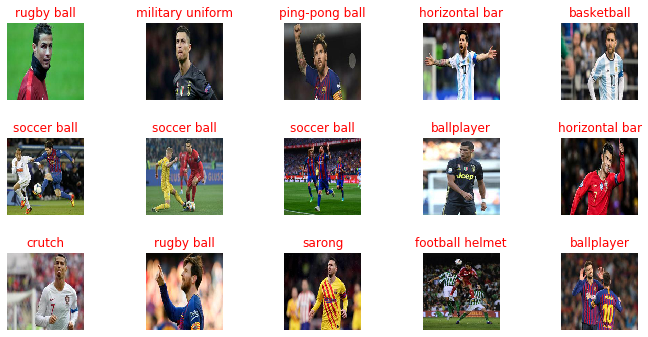

In [32]:
plot_images(image_batch, labels_batch, predicted_class_names)

## Downloading headless model

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [35]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## Adding a classification head

In [37]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


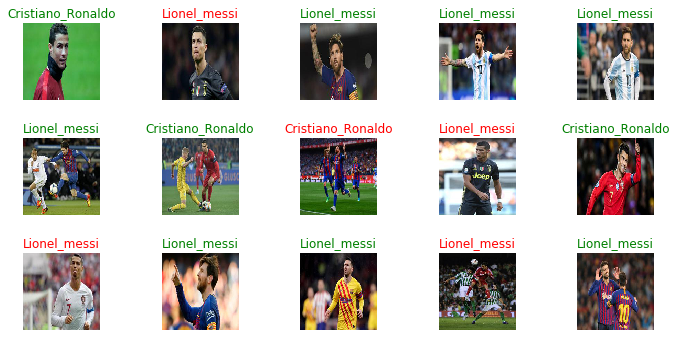

In [38]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 38s 8s/step - loss: 1.2211 - accuracy: 0.5250 - val_loss: 0.8115 - val_accuracy: 0.6263
Epoch 2/5
5/5 [==============================] - 34s 7s/step - loss: 0.5803 - accuracy: 0.7563 - val_loss: 0.6999 - val_accuracy: 0.6364
Epoch 3/5
5/5 [==============================] - 34s 7s/step - loss: 0.4990 - accuracy: 0.7625 - val_loss: 0.6620 - val_accuracy: 0.7576
Epoch 4/5
5/5 [==============================] - 34s 7s/step - loss: 0.3223 - accuracy: 0.8750 - val_loss: 0.6325 - val_accuracy: 0.6970
Epoch 5/5
5/5 [==============================] - 34s 7s/step - loss: 0.3096 - accuracy: 0.8687 - val_loss: 0.6993 - val_accuracy: 0.7778


## Check results

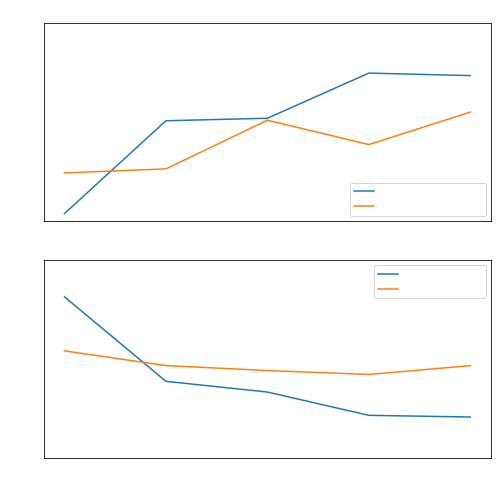

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

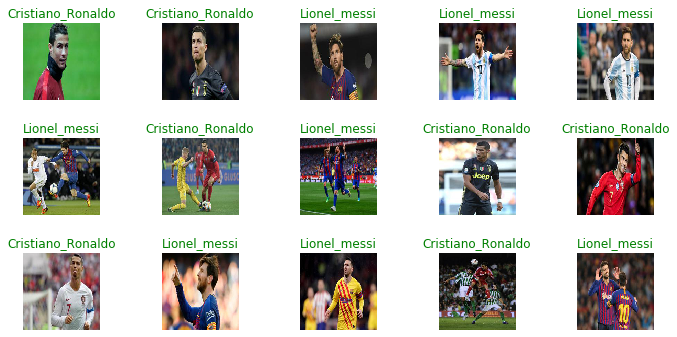

In [42]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

##Application base model

In [0]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

In [0]:
base_model.trainable = False

In [49]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [50]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 43s 9s/step - loss: 0.7032 - accuracy: 0.6187 - val_loss: 1.2822 - val_accuracy: 0.5354
Epoch 2/5
5/5 [==============================] - 39s 8s/step - loss: 0.7211 - accuracy: 0.7188 - val_loss: 1.3379 - val_accuracy: 0.5556
Epoch 3/5
5/5 [==============================] - 39s 8s/step - loss: 0.4134 - accuracy: 0.8188 - val_loss: 1.5216 - val_accuracy: 0.5859
Epoch 4/5
5/5 [==============================] - 39s 8s/step - loss: 0.5022 - accuracy: 0.7500 - val_loss: 0.9572 - val_accuracy: 0.6465
Epoch 5/5
5/5 [==============================] - 38s 8s/step - loss: 0.4950 - accuracy: 0.8067 - val_loss: 1.2676 - val_accuracy: 0.5859


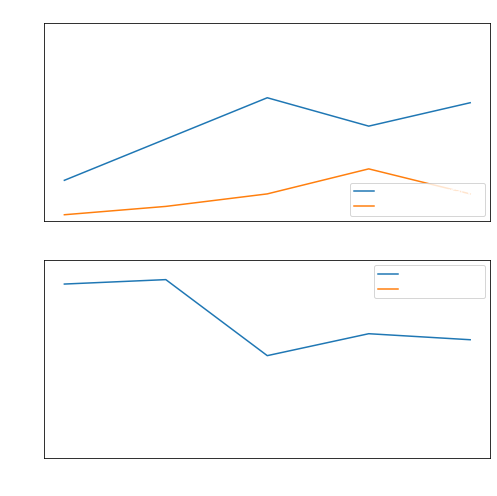

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

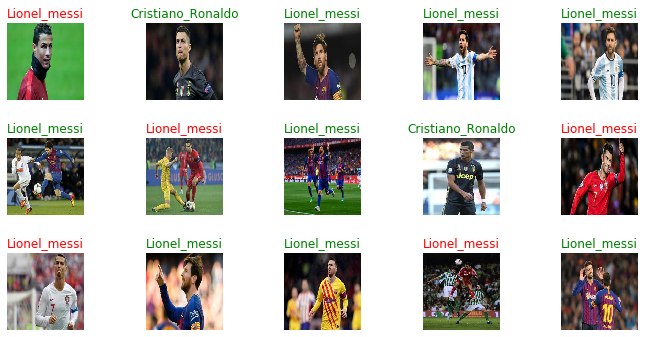

In [54]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Fine tuning

In [0]:
base_model.trainable = True

In [56]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  190


In [57]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [58]:
initial_epochs = 5
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 5/10
5/5 [==============================] - 52s 10s/step - loss: 0.7643 - accuracy: 0.6933 - val_loss: 1.4305 - val_accuracy: 0.6566
Epoch 6/10
5/5 [==============================] - 51s 10s/step - loss: 0.4281 - accuracy: 0.8062 - val_loss: 4.4769 - val_accuracy: 0.5960
Epoch 7/10
5/5 [==============================] - 51s 10s/step - loss: 0.4064 - accuracy: 0.8062 - val_loss: 9.0024 - val_accuracy: 0.5657
Epoch 8/10
5/5 [==============================] - 49s 10s/step - loss: 0.2933 - accuracy: 0.8600 - val_loss: 22.3362 - val_accuracy: 0.5859
Epoch 9/10
5/5 [==============================] - 49s 10s/step - loss: 0.2081 - accuracy: 0.9400 - val_loss: 21.5698 - val_accuracy: 0.6970
Epoch 10/10
5/5 [==============================] - 49s 10s/step - loss: 0.0758 - accuracy: 0.9800 - val_loss: 11.2271 - val_accuracy: 0.7677


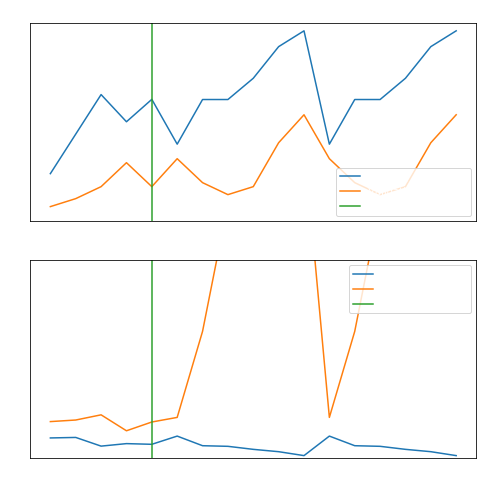

In [60]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

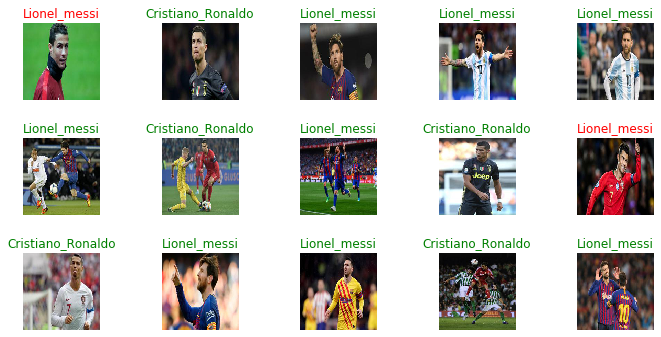

In [61]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)